# Titanic Data Exploration
#### Author: Benjamin D Hamilton
    
The purpose of this notebook is capture most of the data exploration performed for the Kaggle Titanic toy dataset competition. It has been tidied up from its original form.




This notebook is organized in two large sections. 
- ***Section 1*** is initial data examination and visualization
- ***Section 2*** examines individual features in greater detail


Tentative Conclusions:
- If you want to survive, ride 1st class and leave your family at home
    
Recommendations for Next Step:
- Create a feature Family = SibSp + Parch + 1
- Create a feature Fare_Indiv = Fare / (Ticket Multiplicity)
- Create several features from Name, TBD
- Create feature for Cabin Letter
- Check and Manage Outliers

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

# Section 1: Data Introduction

## 1A: Examination and Visualization

TODO: 
- Import Data
- Check out head and tail

In [4]:
train = pd.read_csv('./datasets/train.csv')
train_cols = train.columns
train_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


TODO:
- Check Unique, Null Values
- Make notes on feature observations

In [7]:
#Column names, data types, missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
print("Nulls:\n", train.isnull().sum())

Nulls:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


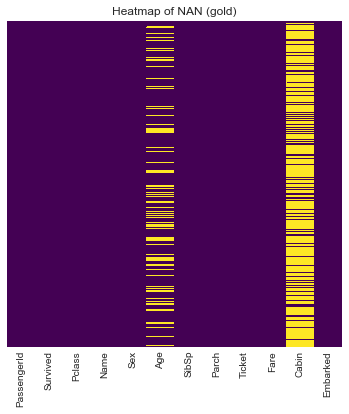

In [9]:
plt.figure(figsize=(6,6))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Heatmap of NAN (gold)')
plt.show()

### Notes from the above:
- ***Cabin*** and ***Age*** have many missing values
- ***Embarked*** has 2 missing values
- Text based features:
    - ***Name*** (Last, Title. First)
    - ***Sex*** (male, female)
    - ***Ticket*** (Varies widely)
    - ***Cabin*** (Ship Deck, Room Number)
    - ***Embarked*** (One of 3 letters)
- Numerical features:
    - ***PassengerId
    *** (use as an index later)
    - ***Survived*** is 0 or 1    <--- categorical
    - ***Pclass*** is 1,2,3 <--- categorical
    - ***Age*** is float
    - ***SibSp*** is int
    - ***Parch*** is int
    - ***Fare*** is float

TODO:
- Make sure every ***PassengerId*** is unique

In [10]:
print("Number of IDs:", len(train.PassengerId.unique()))
print("Number of Passengers:", len(train.PassengerId))
#Yep

Number of IDs: 891
Number of Passengers: 891


TODO:
- Check unique values to see if there are any strange entries:

***Survived***

In [11]:
#Survived is OK
train.Survived.unique()

array([0, 1], dtype=int64)

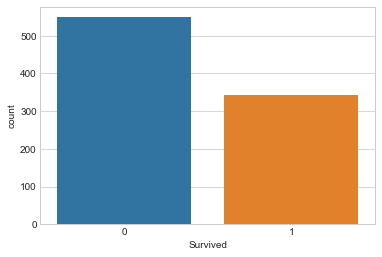

In [12]:
sns.countplot(x='Survived',data=train)
plt.show()

***Pclass***

In [13]:
#Pclass is OK
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

Text(0.5,1,'P Class Survival')

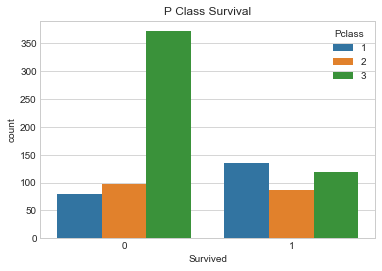

In [14]:
#parsed by class
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.title('P Class Survival')

***Name***
- Names are complicated and will be dealt with in more detail later

In [15]:
#Check Names... ... ... there is a lot going on here.
print("Unique Names: ",len(train.Name.unique()))  #everybody has their own name
train.Name.unique()[:15]

Unique Names:  891


array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina'], dtype=object)

***Sex***

In [16]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

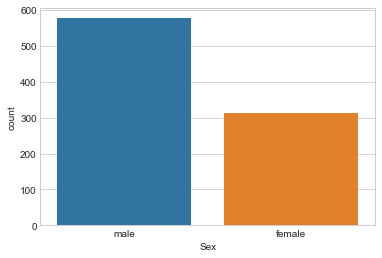

In [17]:
sns.countplot(x='Sex',data=train)
plt.show()

Text(0.5,1,'Gender Survival')

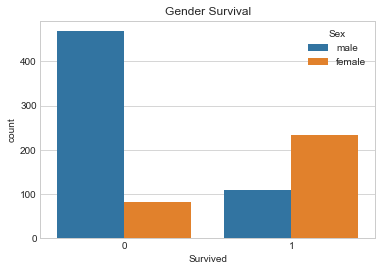

In [18]:
#parsed by gender
sns.countplot(x='Survived',hue='Sex',data=train)
plt.title('Gender Survival')

***Age***
- Most passengers were between 20-30
- There is a big drop for early teenagers
- Peaks again for children
- Long tail out to old age

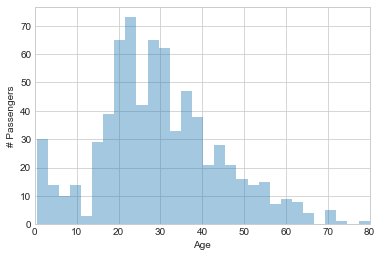

In [19]:
#Prefer using a distplot:
sns.distplot(train.Age.dropna(),kde=False,bins=30)
plt.xlim(0,80)
plt.ylabel('# Passengers')
plt.show()

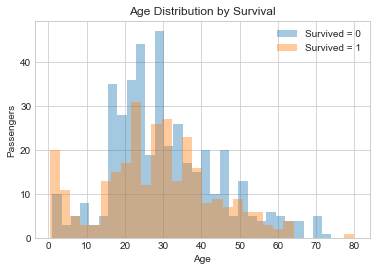

In [20]:
#sns.distplot(train.Age.dropna(),bins=30,kde=False)
sns.distplot(train.Age.where(train.Survived==0).dropna(),bins=30,kde=False)
sns.distplot(train.Age.where(train.Survived==1).dropna(),bins=30,kde=False)
plt.legend(('Survived = 0', 'Survived = 1'))
plt.title('Age Distribution by Survival')
plt.ylabel('Passengers')
plt.show()

***Age and Survival by Class***

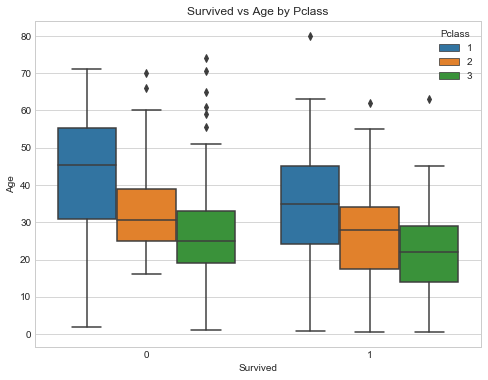

In [21]:
#Boxplots for distribution across each class, split by survived
plt.cla
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived',y='Age',hue='Pclass',data=train)
plt.title('Survived vs Age by Pclass')
plt.show()

***Age and Class by Sex***

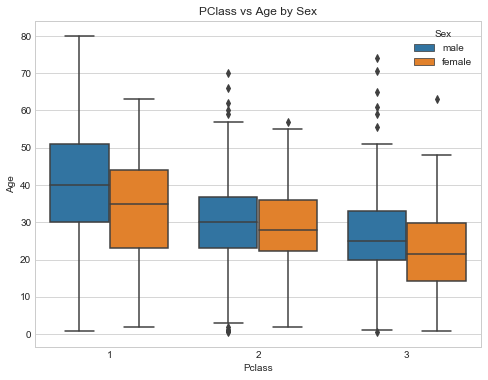

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train)
plt.title('PClass vs Age by Sex')
plt.show()

***SibSp*** and ***Parch***
- ***SubSp***
    - Only has values 0 through 5 and 8 (one very, very big family)
    - Heavily skewed towards 0

In [23]:
#What unique values?
train.SibSp.unique()     #0 through 5, 8

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

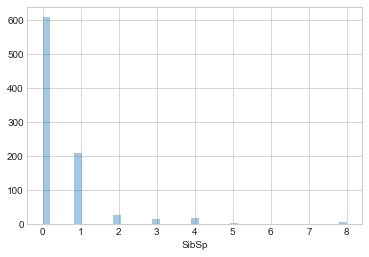

In [24]:
sns.distplot(train.SibSp,kde=False)
plt.show()

- ***Parch***
    - Values 0 through 6
    - Heavily skewed towards 0

In [25]:
#What unique values?
train.Parch.unique()          # 0 through 6

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

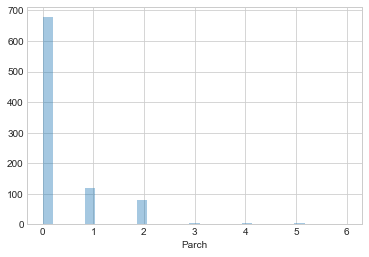

In [26]:
sns.distplot(train.Parch,kde=False)
plt.show()

In [27]:
print("Nulls: ", train.Ticket.isnull().sum())
print("Total Tickets: ", len(train.Ticket), " (1 per passenger)")
print("Unique Tickets: ", len(train.Ticket.unique()), " (some people share ticket numbers)")

Nulls:  0
Total Tickets:  891  (1 per passenger)
Unique Tickets:  681  (some people share ticket numbers)


## 1B: Basic Statistics

In [28]:
train.drop(['PassengerId','Survived'],axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


***Correlation Matrix***

In [29]:
train.drop('PassengerId',axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Section 2 - Detailed Analysis
## 2A: TICKETS

In [30]:
#Let's see what tickets share numbers...
train.Ticket.value_counts(ascending=False)[0:10]

CA. 2343        7
347082          7
1601            7
3101295         6
CA 2144         6
347088          6
382652          5
S.O.C. 14879    5
17421           4
347077          4
Name: Ticket, dtype: int64

TODO:
- Look for similarities in passenger records using Ticket Name
- Note, the value counts list is indexed by ticket name and has only 1 column (the integers)

In [31]:
#Record to make life easier
tick_val_ct = train.Ticket.value_counts(ascending=False)

***Meet the Sage Family***
    - Missing all ages and cabins
    - All are in 3rd class
    - It says 8 SibSp and 2 Parch, but there are only 7 on this ticket. If SibSp = 8, then there needs to be 9 people.
    - These are probably 7 of 9 siblings. The 8th & 9th sibling and 2 parents are not on this ticket.
        - The last Name does not lead to the rest of the family
        - Nor does a search for others with SibSp = 8
        - Nor does a search for 2 parents with 9 kids (Parch = 9, but I looked for 7+ anyway)
    - Sage Family Data is not self-consistent! 
***They are probably in the test set!***

In [32]:
train[train.Ticket == tick_val_ct.index[0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [33]:
#A quick glance reveals that no other Sage's are on board. 
train[train.Name.str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [34]:
#Nor are there any people with SibSp = 8
train[train.SibSp == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [35]:
#And the parents should have Parch = the SubSp+1
#There are no such person
train[train.Parch > 7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


***Meet the Anderson Family***
    - Missing all cabins, has all ages
    - All are in 3rd class
    - SibSp and Parch sums to 6; they and the ages correspond appropriately to parents and their children
    - Data appears self consistent, whole family is in the training set

In [36]:
train[train.Ticket == tick_val_ct.index[1]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


***Meet Various Asian (and maybe other ethincity) Men***
    - Missing all cabins and some ages
    - All are in 3rd class
    - Names and cultural customs make it unclear whether these men are related
    - SibSp and Parch are all 0, indicating they were all travelling solo -or- the data wasn't collected properly
    - Why are they on the same ticket? Bought together? Brokered? Interesting to think about.

In [37]:
train[train.Ticket == tick_val_ct.index[2]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


***Meet the Skoog Family***
    - Missing all cabins, has all ages
    - All are in 3rd class
    - Ages, SibSp, and Parch are consistent for a family of 6

__Growing Question: Does the Fare count for the single ticket? If so, it may be worth adding fare/ticket holder as a feature__

In [38]:
train[train.Ticket == tick_val_ct.index[3]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


***Goodwin Family***
- Children with SibSp = 5 indicates that 6 siblings are on the ship
- Children with Parch = 2 indicates that 2 parents are on the ship
- Only one parent with SibSp = 1 and Parch = 6 indicates that spouse and six kids are on board
- This ticket only has 1 parent and 5 of the kids on it.

__Where is parent #2 (Mr. Fredrick Goodwin should be his name) and mystery kid 6? Probably in the Test Set__

In [39]:
train[train.Ticket == tick_val_ct.index[4]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [40]:
#Searching on the last name shows no more:
train[train.Name.str.contains('Goodwin')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [41]:
#Searching on the SibSp = 5 and Parch = 6 reveal no missing parent or child
train[train.SibSp == 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [42]:
train[train.Parch == 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


***Meet the Panula Family***
    - Missing all cabins, has all ages
    - All are in 3rd class
    - SibSp and Parch sums to 5; they and the ages correspond appropriately to parents and their children
    - Data appears self consistent, 5 kids (SibSp 4, Parch 1) and 1 parent (SibSp 0, Parch 1), all in train set

In [43]:
train[train.Ticket == tick_val_ct.index[5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S


***Meet the Rice Family***
    - Missing all cabins, has all ages
    - All are in 3rd class
    - SibSp and Parch sums to 5; they and the ages correspond appropriately to parents and their children
    - 1 Parent on board, 5 Kids, but only 4 kids are shown. Kid #5 is missing. Probably in Test Set

In [44]:
train[train.Ticket == tick_val_ct.index[6]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q


- PC is exclusive for Pclass = 1 (1st class ticket)

In [45]:
print("Total 1st class tickets: ", train.Pclass[train.Pclass == 1].sum())
print("Tickets with PC on them: ", len(train[train.Ticket.str.contains('PC')]))

Total 1st class tickets:  216
Tickets with PC on them:  60


In [46]:
train[train.Ticket.str.contains('PC')].drop(['PassengerId','Survived'],axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,60.0,50.000000,60.000000,60.000000,60.000000
mean,1.0,37.120000,0.333333,0.233333,122.080483
std,0.0,13.362512,0.572437,0.499717,114.189525
min,1.0,16.000000,0.000000,0.000000,25.925000
25%,1.0,24.750000,0.000000,0.000000,49.504200
50%,1.0,36.000000,0.000000,0.000000,79.200000
75%,1.0,47.500000,1.000000,0.000000,148.256225
max,1.0,71.000000,2.000000,2.000000,512.329200


- SW or S.W. are related:

In [47]:
train[train.Ticket.str.contains('SW') | train.Ticket.str.contains('S.W.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5,NaN,S


***TICKET OBSERVATIONS:***

- There are passengers suggested by SibSp and Parch values that are not in the training set
    - They are probably in the test set. Going to run with the assumption that they are
    - Not going to look into the test set to see, though. That feels like cheating.
    

- Are Ticket Fares are for single ticket or per person? 
    - Analyzing fare/ticket mult may be useful.
    - May be useful to use total family number instead of training set multiplicity to capture
    - except for when family number doesn't exist (like w/ the Asians). Need an alternative there.

## 2B: Fares

TODO:
- Unique Fare Values, Statistics, Top 10
- Distribution Plot

In [48]:
len(train.Fare.unique())  #248 fare classes, includes NAN if there are some p

248

In [49]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [50]:
#Top 10:
train.Fare.sort_values(ascending=False)[0:9].values

array([ 512.3292,  512.3292,  512.3292,  263.    ,  263.    ,  263.    ,
        263.    ,  262.375 ,  262.375 ])

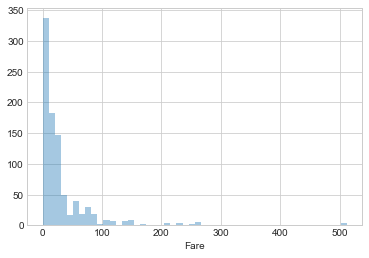

In [51]:
Figsize=(8,6)
sns.distplot(train.Fare,kde=False)
plt.show()

TODO:
***Transform Fares to examine costs as if each ticket was paid for only once***
- An individual's fare is the ticket cost divided by the higher of family size or ticket holders
    - family = SibSp + Parch + 1
    - ticket holders is the multiplicity of the ticket _in the training set_, and may be missing a few in the test set
- This allows the most accuracy for individuals travelling alone and families documented properly
- It affords modest accuracy for cases like the Asians, above, where unrelated people were on 1 ticket

In [52]:
#Make a feature for fare cost / family size
train['Family'] = train['SibSp'] + train['Parch'] + 1
train['Fare_Indiv_FamilyCt'] = train.Fare / train.Family

#Make a feature for fare cost / ticket multiplicity
train['Ticket_Count'] = train.Ticket.apply(lambda x: train.Ticket.value_counts().loc[str(x)])
train['Fare_Indiv_TicketCt'] = train.Fare / train.Ticket_Count

In [53]:
train.Fare_Indiv_FamilyCt.head()

0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: Fare_Indiv_FamilyCt, dtype: float64

In [54]:
train.Fare_Indiv_TicketCt.head()

0     7.2500
1    71.2833
2     7.9250
3    26.5500
4     8.0500
Name: Fare_Indiv_TicketCt, dtype: float64

In [55]:
#Create the Individual Fares using the smallest of the two
train['Fare_Indiv'] = train[['Fare_Indiv_FamilyCt','Fare_Indiv_TicketCt']].min(axis=1)
train.drop(['Fare_Indiv_FamilyCt','Fare_Indiv_TicketCt'],axis=1,inplace=True)

In [56]:
train.Fare_Indiv.head()

0     3.62500
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: Fare_Indiv, dtype: float64

TODO:
- Examine two cases
    - Family number is higher than members that appear in training set (The Andersson Family returns)
    - Non-family members share a ticket (the Asian (and other) guys return)

In [57]:
#Compare the Andersson Family and the Asian Guys (tm) 
#Pick choice columns for examination
#Take a look at the head to see how it plays out.
train[(train.Ticket.str.contains(tick_val_ct.index[1]) | \
       train.Ticket.str.contains(tick_val_ct.index[2]))].\
        loc[:,['Name','Ticket','Fare','Ticket_Count','Family','Fare_Indiv']].head()

,Name,Ticket,Fare,Ticket_Count,Family,Fare_Indiv
13,"Andersson, Mr. Anders Johan",347082,31.2750,7,7,4.467857
74,"Bing, Mr. Lee",1601,56.4958,7,1,8.070829
119,"Andersson, Miss. Ellis Anna Maria",347082,31.2750,7,7,4.467857
169,"Ling, Mr. Lee",1601,56.4958,7,1,8.070829
509,"Lang, Mr. Fang",1601,56.4958,7,1,8.070829


TODO
- Compare descriptive statistics
- Transformed Fare histogram

In [58]:
print('Listed Fares: \n', train.Fare.describe())
print('\nIndividual Fares:\n', train.Fare_Indiv.describe())

Listed Fares: 
 count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Individual Fares:
 count    891.000000
mean      15.463672
std       18.187769
min        0.000000
25%        7.239600
50%        8.050000
75%       14.775000
max      221.779200
Name: Fare_Indiv, dtype: float64


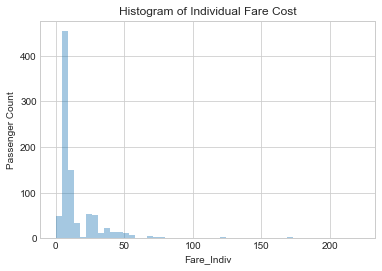

In [59]:
sns.distplot(train.Fare_Indiv,kde=False)
plt.title('Histogram of Individual Fare Cost')
plt.ylabel('Passenger Count')
plt.show()

- ***Fare and Fare_Indiv have different correlations*** with the other features:
    - This nonlinear transformation may be useful in modelling

In [60]:
train.drop('PassengerId',axis=1).corr().loc[:,['Fare','Fare_Indiv']]

,Fare,Fare_Indiv
Survived,0.257307,0.237628
Pclass,-0.549500,-0.661215
Age,0.096067,0.258278
SibSp,0.159651,-0.083311
Parch,0.216225,-0.039441
Fare,1.000000,0.842068
Family,0.217138,-0.076645
Ticket_Count,0.345541,0.036744
Fare_Indiv,0.842068,1.000000


## 2C: Names

- ***Name*** entires have the patern:
    - LastName, Title. FirstNames
        - ex. 'Allen, Mr. William Henry'
    - Women with "Title." = "Mrs." use Husband's FirstNames with their own name in parentheses
        - ex. 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
    - Title. includes Mr. Mrs. etc... more on that later.
    - Special Cases: FirstName is generally the first name of the passenger
    - If the passenger is a married woman with title Mrs. the First name is of the form "HusbandFirstName (Woman's Full Name)
    
Note: It will be worth splitting this up a bit to examine the impact of Titles on the models.

In [61]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

***More on this in the data workup... a lot more***

## 2D: Embarked

TODO:
- Check uniques, Make Plots, Check Nans
- Decide how to impute

In [62]:
train.Embarked.unique()     #3 categories, a some NANs

array(['S', 'C', 'Q', nan], dtype=object)

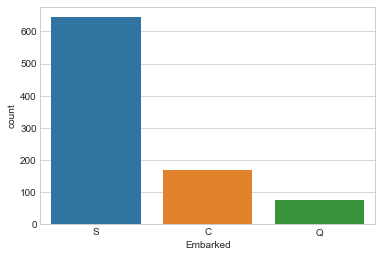

In [63]:
sns.countplot('Embarked',data=train)

In [64]:
len(train.Embarked.unique())   #INCLUDES NANs

4

In [65]:
#Two null embarked entries are for two unrelated women travelling together, sharing a ticket and cabin
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket_Count,Fare_Indiv
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,2,40.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,2,40.0


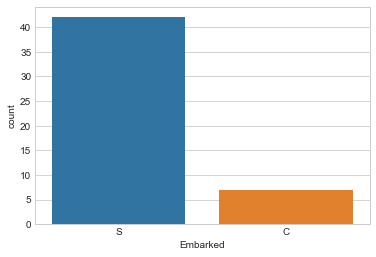

In [66]:
#Almost everybody whose ticket starts with '113' is from port 'S'...
#Will use that to impute later.
sns.countplot('Embarked',data=train[train.Ticket.str.contains('113')])

## 2E: Cabins

TODO:
- Split the samples into Cabin = Null and Cabins != Null sets
- Examine the Cabins != Null set
    - Get unique entries
    - Get multiplicity of entries (who is sharing a room)
    - Make observations on data

In [67]:
#Null set:
trcabnull = train[train.Cabin.isnull()]
trcabnull.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket_Count,Fare_Indiv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,2,1,3.625
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,1,1,7.925


In [68]:
#Not Null set:
trcabnot = train[~train.Cabin.isnull()]
trcabnot.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket_Count,Fare_Indiv
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,35.641650
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,26.550000
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,51.862500
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3,2,5.566667
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,1,26.550000


In [69]:
#Unique Cabin entries:
trcabnot.Cabin.unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

***Notes***: 
- Some of them have multiple entries, 
    - ex: 'C23 C25 C27' (titantic map indicates its a suite)
    - ex: 'F G63' (unclear. Even looked at the titanic floorplan and this isn't clear)
- Most begin with A, B, C, D, E
- Some F and G
    - The G part is confusing; the A - F are very clear in the titanic deck plans, G may be for crew
- one T
    - Captains quarters? 


***Multiplicity***: 

- Number of passengers that share this room, according to the training data I have
- This is not the same as number of passengers who may actually be IN the room... the test set may hold some of those

In [70]:
trcabnot.Cabin.value_counts()[:5]

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
Name: Cabin, dtype: int64

In [71]:
### Occurrance of the rare ones:
print('Contains G:', trcabnot.Cabin.str.contains('G').sum())
print('Contains F:', trcabnot.Cabin.str.contains('F').sum())
print('Contains T:', trcabnot.Cabin.str.contains('T').sum())

Contains G: 7
Contains F: 13
Contains T: 1


***Look Closer at the Residents of Deck G***
- Two women and their two daughters are in cabin G6
- Cabin F G73 is two men (that are visible in the training data)
- Cabin F G63 is one man (in training data, probably 2 in actuality   --> I think the F Gxx combo is 3rd class quarters 

***Observation***: It is hard to use the cabin information because so much is missing, still, I don't want to get rid of it yet. It may be useful in decision tree algorithms.

In [72]:
trcabnot[trcabnot.Cabin.str.contains('G')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket_Count,Fare_Indiv
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3,2,5.566667
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,1,1,7.650000
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,2,2,5.231250
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,3,2,3.487500
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,3,2,5.566667
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,1,1,7.650000
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,1,1,7.650000


***Take a closer look at Deck F***
- Note that F Gxx and F Exx correspond to 3rd class

In [73]:
trcabnot[trcabnot.Cabin.str.contains('F')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket_Count,Fare_Indiv
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S,1,1,10.500000
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,1,1,7.650000
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,3,2,7.452767
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S,3,3,8.666667
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,4,2,9.750000
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,3,3,8.666667
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S,3,3,8.666667
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S,1,1,13.000000
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S,1,1,10.500000
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,4,2,9.750000


***The single "T" Cabin:***

In [74]:
trcabnot[trcabnot.Cabin.str.contains('T')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket_Count,Fare_Indiv
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,1,1,35.5


***It may be worth extracting the cabin letter and using it as a feature (that may be dropped when appropriate for a model)***

## 2E: Family (new feature)

In [75]:
train.Family = train.SibSp + train.Parch + 1

In [76]:
train.Family.head()

0    2
1    2
2    1
3    2
4    1
Name: Family, dtype: int64

Text(0.5,0,'Family Count (1 = self)')

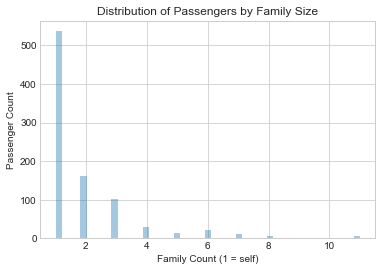

In [77]:
sns.distplot(train.Family,kde=0)
plt.title('Distribution of Passengers by Family Size')
plt.ylabel('Passenger Count')
plt.xlabel('Family Count (1 = self)')

***Re-examine Basic Stats, Including Family and Fare_Indiv***

In [78]:
train.drop(['PassengerId','Survived'],axis=1).describe()

,Pclass,Age,SibSp,Parch,Fare,Family,Ticket_Count,Fare_Indiv
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,1.787879,15.463672
std,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,1.361142,18.187769
min,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,1.000000,7.239600
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,8.050000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,2.000000,14.775000
max,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,7.000000,221.779200


In [79]:
train.drop('PassengerId',axis=1).corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Ticket_Count,Fare_Indiv
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.038247,0.237628
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.002633,-0.661215
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,-0.253507,0.258278
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,0.661622,-0.083311
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,0.593076,-0.039441
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,0.345541,0.842068
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,0.748487,-0.076645
Ticket_Count,0.038247,-0.002633,-0.253507,0.661622,0.593076,0.345541,0.748487,1.000000,0.036744
Fare_Indiv,0.237628,-0.661215,0.258278,-0.083311,-0.039441,0.842068,-0.076645,0.036744,1.000000


***Heatmap of Feature Correlation***

- Shows modest correlations in mostly expected ways
- ***Fare and Fare_Indiv do not have the same correlations***, which makes the transformation useful!

In [80]:
train.drop('PassengerId',axis=1).corr().loc[:,['Fare','Fare_Indiv']]

,Fare,Fare_Indiv
Survived,0.257307,0.237628
Pclass,-0.549500,-0.661215
Age,0.096067,0.258278
SibSp,0.159651,-0.083311
Parch,0.216225,-0.039441
Fare,1.000000,0.842068
Family,0.217138,-0.076645
Ticket_Count,0.345541,0.036744
Fare_Indiv,0.842068,1.000000


Text(0.5,1,'Heatmap of Correlations for Features')

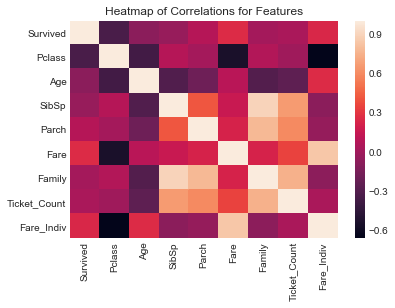

In [81]:
sns.heatmap(train.drop('PassengerId',axis=1).corr())
plt.title('Heatmap of Correlations for Features')

***Survival and Family Size***



Text(0.5,1,'Survival vs Family Size for Sex')

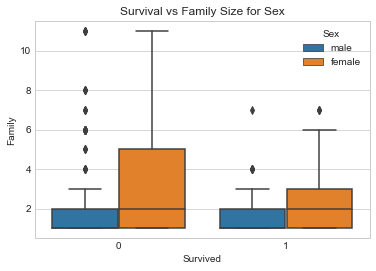

In [82]:
sns.boxplot(x='Survived',y='Family',hue='Sex',data=train)
plt.title('Survival vs Family Size for Sex')

Text(0.5,1,'Survival vs Family Size by PClass for males only')

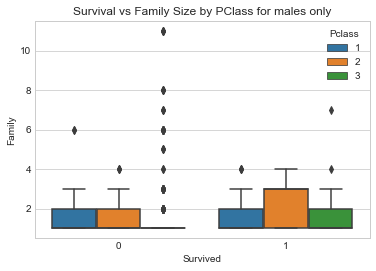

In [83]:
sns.boxplot(x='Survived',y='Family',hue='Pclass',data=train[train.Sex=='male'])
plt.title('Survival vs Family Size by PClass for males only')

Text(0.5,1,'Survival vs Family Size by PClass for females only')

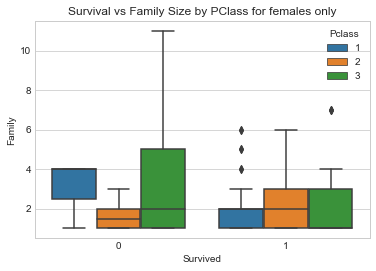

In [84]:
sns.boxplot(x='Survived',y='Family',hue='Pclass',data=train[train.Sex=='female'])
plt.title('Survival vs Family Size by PClass for females only')

***Family Conculsions***
- Increasing family size decreases survival rate
    - It's clear in these visualizations where the Survived = 0 whiskers stretch far higher than Survived = 1
    - It was clear in the ticket multiplicty family checks, where almost everybody in the big groups died
- Family should be useful in the modelling stage, too